### Assignment 3 Submission - Asset Pricing
> Student Name : Ankit Rawat

> Batch : G2 

In [15]:
import pandas as pd
import numpy as np

In [16]:
delta_variable_δ =0.99
gamma_variable_γ = 1
lambda_variable_λ=2
np.random.seed(101010)

In [17]:
df_ = pd.DataFrame(np.random.randn(10**4), columns = {"epsilon"})
df_

,epsilon
0,-0.357768
1,1.660631
2,0.298745
3,1.948800
4,-1.235432
...,...
9995,-0.746797
9996,0.447038
9997,0.905991
9998,-0.930309


### Risk Free Rate Calculation 
\begin{equation*}
\large R_f = \large ({e}^{ρ + γμ - \frac {1}{2} γ ^2 σ ^2 })
\end{equation*}

In [18]:
def risk_free_rate_Calculation ( sigma,gamma,mean,std_deviation):
    return np.exp(  -np.log(sigma)  + gamma*mean  -  (0.5) * np.square(gamma) * np.square(std_deviation))

In [19]:
print (" Risk Free Rate :  {} ".format(risk_free_rate_Calculation( 0.99,1,1.84/100,3.79/100)))
risk_free_rate  = round(risk_free_rate_Calculation( 0.99,1,1.84/100,3.79/100),4)

 Risk Free Rate :  1.0281202458395722 


### Consumption growth has a lognormal distribution: 
\begin{equation*}
\large {ln \tilde{g} = 0.02 + 0.02 ϵ̃}
\end{equation*}

In [20]:
df_["Consumption_growth"] = np.exp( 0.02  + 0.02 * df_["epsilon"] )

> ### Kappa Calculation: 
\begin{equation*}
\large {κ = \frac{1 + price Dividend Ratio} {price Dividend Ratio}}
\end{equation*}

In [21]:
def kappa (dividend,price):
    return ((1 + np.divide(dividend/price))/(np.divide(dividend/price)))

In [22]:
delta_variable_δ =0.99
gamma_variable_γ = 1
lambda_variable_λ=2

In [29]:
def expected_utility(x):
    utility = []
    for i in df_["Consumption_growth"]:
        if x *i >= 1.0303:
            Financial_Gain_Loss = x*i - 1.0303
        else: 
            Financial_Gain_Loss = 2 * ( x*i - 1.0303 )
        utility.append(Financial_Gain_Loss)
    
    return np.mean(utility)

In [30]:
def Error_Calculation(x):
    return delta_variable_δ * b0 * expected_utility(x) + 0.99 * x -1

In [33]:
def bisection1(a,b):
    if (Error_Calculation(a) * Error_Calculation(b) >=0):
        print ("wrong")
        return
    
    c = a
    while np.abs(Error_Calculation(c)) >= 10**(-5):
        c = (a+b)/2
        
        if (Error_Calculation(c)*Error_Calculation(a) <0):
            b = c
        else :
            a =c 
    
    return c

In [38]:
root = []
b0_arange  = np.arange(0,10.1,0.1)
for b0 in b0_arange:
    c = bisection1(1,1.1)
    root.append( [round(c,5)])

In [39]:
root

[[1.01011],
 [1.01072],
 [1.01121],
 [1.01158],
 [1.01189],
 [1.01216],
 [1.01238],
 [1.01256],
 [1.01272],
 [1.01287],
 [1.01299],
 [1.0131],
 [1.0132],
 [1.01329],
 [1.01337],
 [1.01345],
 [1.01351],
 [1.01357],
 [1.01363],
 [1.01368],
 [1.01373],
 [1.01378],
 [1.01382],
 [1.01386],
 [1.0139],
 [1.01393],
 [1.01396],
 [1.014],
 [1.01402],
 [1.01405],
 [1.01407],
 [1.0141],
 [1.01412],
 [1.01414],
 [1.01417],
 [1.01418],
 [1.01421],
 [1.01422],
 [1.01424],
 [1.01426],
 [1.01427],
 [1.01429],
 [1.0143],
 [1.01432],
 [1.01433],
 [1.01434],
 [1.01436],
 [1.01437],
 [1.01438],
 [1.01439],
 [1.0144],
 [1.01441],
 [1.01442],
 [1.01443],
 [1.01444],
 [1.01445],
 [1.01446],
 [1.01447],
 [1.01448],
 [1.01448],
 [1.01449],
 [1.0145],
 [1.01451],
 [1.01451],
 [1.01452],
 [1.01453],
 [1.01453],
 [1.01454],
 [1.01455],
 [1.01455],
 [1.01456],
 [1.01456],
 [1.01457],
 [1.01458],
 [1.01458],
 [1.01459],
 [1.01459],
 [1.0146],
 [1.0146],
 [1.01461],
 [1.01461],
 [1.01461],
 [1.01462],
 [1.01462],
 [1

###   Price Dividend Ratio: 
\begin{equation*}
\large {\frac{P} {D}} =  \large {\frac{1} {x-1}}
\end{equation*}

In [48]:
price_div_ratio = []
for x in pd.DataFrame(root).values:
    ratio =  1 /( x -1)
    price_div_ratio.append(ratio)

In [49]:
price_div_ratio

[array([98.91196835]),
 array([93.28358209]),
 array([89.20606601]),
 array([86.35578584]),
 array([84.10428932]),
 array([82.23684211]),
 array([80.77544426]),
 array([79.61783439]),
 array([78.6163522]),
 array([77.7000777]),
 array([76.98229407]),
 array([76.33587786]),
 array([75.75757576]),
 array([75.24454477]),
 array([74.79431563]),
 array([74.34944238]),
 array([74.019245]),
 array([73.69196758]),
 array([73.36757153]),
 array([73.0994152]),
 array([72.83321194]),
 array([72.56894049]),
 array([72.35890014]),
 array([72.15007215]),
 array([71.94244604]),
 array([71.78750897]),
 array([71.63323782]),
 array([71.42857143]),
 array([71.32667618]),
 array([71.17437722]),
 array([71.0732054]),
 array([70.92198582]),
 array([70.82152975]),
 array([70.72135785]),
 array([70.5716302]),
 array([70.52186178]),
 array([70.37297678]),
 array([70.32348805]),
 array([70.2247191]),
 array([70.12622721]),
 array([70.07708479]),
 array([69.9790063]),
 array([69.93006993]),
 array([69.83240223]

Text(0.5, 1.0, 'Pirce/Dividend Vs b0')

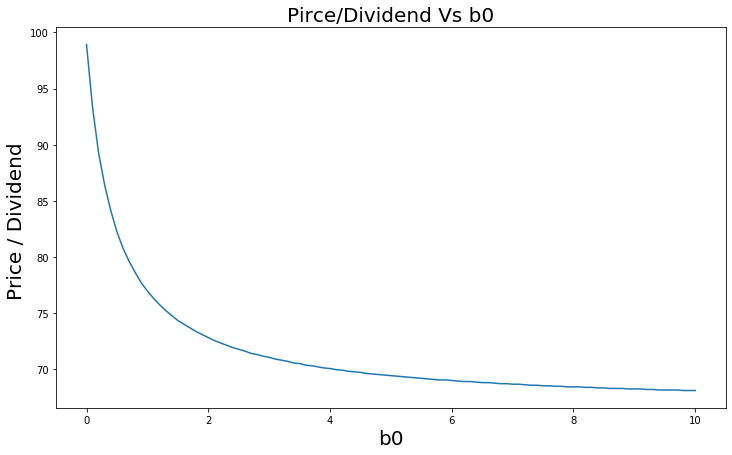

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
plt.plot(b0_arange,price_div_ratio)
plt.xlabel('b0',fontsize =20)
plt.ylabel('Price / Dividend ',fontsize =20)
plt.title("Pirce/Dividend Vs b0",fontsize =20)

### Calculate the expected market Return

In [52]:
expected_market_return = []
for x in root:
    r  = np.multiply(x , np.exp(0.02 + (1/2) * (0.02 ** 2)))
    expected_market_return.append(r)

In [53]:
expected_market_return

[array([1.0307217]),
 array([1.03134415]),
 array([1.03184415]),
 array([1.0322217]),
 array([1.03253802]),
 array([1.03281353]),
 array([1.03303802]),
 array([1.03322169]),
 array([1.03338496]),
 array([1.03353802]),
 array([1.03366047]),
 array([1.03377271]),
 array([1.03387475]),
 array([1.03396659]),
 array([1.03404822]),
 array([1.03412985]),
 array([1.03419108]),
 array([1.0342523]),
 array([1.03431353]),
 array([1.03436455]),
 array([1.03441557]),
 array([1.03446659]),
 array([1.0345074]),
 array([1.03454822]),
 array([1.03458904]),
 array([1.03461965]),
 array([1.03465026]),
 array([1.03469108]),
 array([1.03471148]),
 array([1.0347421]),
 array([1.0347625]),
 array([1.03479312]),
 array([1.03481352]),
 array([1.03483393]),
 array([1.03486455]),
 array([1.03487475]),
 array([1.03490536]),
 array([1.03491557]),
 array([1.03493597]),
 array([1.03495638]),
 array([1.03496659]),
 array([1.03498699]),
 array([1.0349972]),
 array([1.03501761]),
 array([1.03502781]),
 array([1.0350380

In [59]:
equity_premium = np.array(expected_market_return) - 1.0303

Text(0.5, 1.0, 'Equity Premium Vs b0')

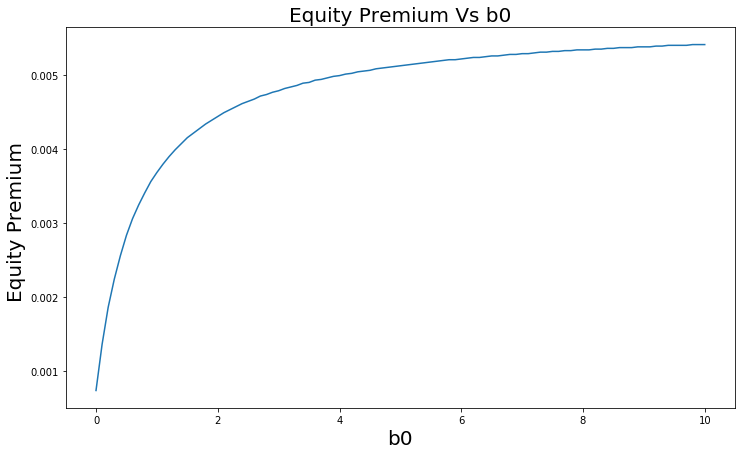

In [65]:
plt.figure(figsize = (12,7))
plt.plot(b0_arange,equity_premium)
plt.xlabel('b0',fontsize =20)
plt.ylabel('Equity Premium ',fontsize =20)
plt.title("Equity Premium Vs b0",fontsize =20)

> ### Briefly explain the economic significance of the investor's utility function for financial gain or loss [i.e., 𝜈(R)]b

* The term “loss aversion” describes the greater sensitivity to losses as compared to gains; 
* the expected negative feeling associated with a loss is larger than the expected positive feeling with a gain of equal size. Loss aversion is not necessarily a judgment error, it might as well reflect the true preferences of people, who strongly dislike losses ( Risk Averse Investor ) . 
* Alternatively, it is argued that loss aversion represents an emotional overreaction toward losses driven by fear. Hence, the weight (λ) assigned on loss is more than the weight assigned on gain.
* In prospect theory, the value function is steeper for losses than for gains, representing the greater sensitivity (λ) toward losses.

> ### economic significance of the parameters b0 and 𝜆.

* λ represents the loss aversion coefficient. For any λ > 1 an individual is said to be loss averse. In our case  λ = 2 hence we are cosidering risk averse investros for whome utility of loss is more than gain 

> ### economic significance of the parameters b0

* On an investment, investor receives utility from individual consumption and Financial Gain and Loss.
* Since both consumption and Financial Gain / Loss have different unit hence we use it to convert Gain/Loss magnitude to make it comparable to Consumption
* b0 determines amount of emphasis investor puts on utility from financial gain / loss verses utility of consumption
* Higher the b0 value more weighted for Financial gain / loss
* Also as b0 -> infinity, equity premium becomes constant.
